# ----------------------Fake News Detection using Machine Learning----------------------

 <img src = "fake-news.jpg">

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Load Dataset

In [2]:
# fake and Real dataset
df_fake = pd.read_csv('fake_news_dataset.csv')
df_true = pd.read_csv('real_news_dataset.csv')

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Creating new column called "class" for Fake News and Real News dataset to categories fake and true news.

In [5]:
df_fake['class'] = 0
df_true['class'] = 1

In [6]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
df_fake.shape

(23481, 5)

In [8]:
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
df_true.shape

(21417, 5)

### Removing last 10 rows from both the dataset, for manual testing

In [10]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i],axis = 0,inplace = True)
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [11]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [12]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [13]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


### Merging the manual testing dataframe in single dataset and save it in a csv file

In [14]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing],axis = 0)
df_manual_testing.to_csv("manual_testing_dataset.csv")

### Merging the main fake and true dataframe

In [15]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


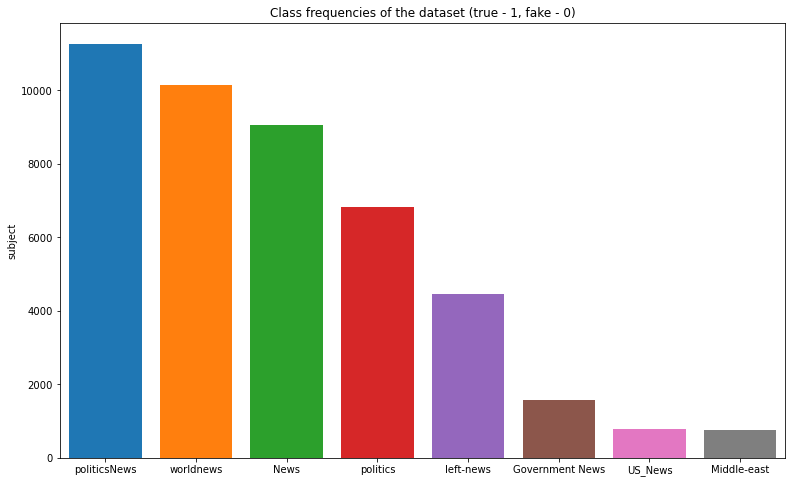

In [16]:
plt.figure(figsize = [13, 8], clear = True, facecolor = 'white')
sns.barplot(x = df_marge["subject"].value_counts().index,
            y = df_marge["subject"].value_counts(),
            saturation = 1).set(title = "Class frequencies of the dataset (true - 1, fake - 0)");

In [17]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

### "title", "subject" and "date" columns is not required for detecting the fake news, so we have to drop these columns.

In [18]:
df = df_marge.drop(["title", "subject","date"], axis = 1)
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [19]:
df.isnull().sum()

text     0
class    0
dtype: int64

### Randomly shuffling the dataframe

In [20]:
df = df.sample(frac = 1)

In [21]:
df.head(10)

,text,class
7600,(Reuters) - Disgraced former U.S. Representati...,1
12760,This story of corruption and collusion is MIND...,0
4429,Trump loves to brag about his foundation while...,0
8930,WASHINGTON (Reuters) - U.S. Secretary of Defen...,1
10986,WASHINGTON (Reuters) - Republican Senator Pat ...,1
12589,Hillary Clinton s corruption is on a scale we...,0
12333,CAIRO (Reuters) - Egypt s aviation minister wi...,1
13140,UPDATE: ANTHONY WEINER JUST DELETED HIS TWITTE...,0
4400,The season premiere of NBC s Saturday Night Li...,0
2108,"College is the time to dream. For many, it s a...",0


### Reseting index

In [22]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [23]:
df.columns

Index(['text', 'class'], dtype='object')

In [24]:
df.head(10)

,text,class
0,(Reuters) - Disgraced former U.S. Representati...,1
1,This story of corruption and collusion is MIND...,0
2,Trump loves to brag about his foundation while...,0
3,WASHINGTON (Reuters) - U.S. Secretary of Defen...,1
4,WASHINGTON (Reuters) - Republican Senator Pat ...,1
5,Hillary Clinton s corruption is on a scale we...,0
6,CAIRO (Reuters) - Egypt s aviation minister wi...,1
7,UPDATE: ANTHONY WEINER JUST DELETED HIS TWITTE...,0
8,The season premiere of NBC s Saturday Night Li...,0
9,"College is the time to dream. For many, it s a...",0


### Creating a function to convert the text in lowercase, remove the extra space, special charecters, ulr and links.

In [25]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [26]:
df["text"] = df["text"].apply(word_drop)

In [27]:
df.head(10)

,text,class
0,reuters disgraced former u s representati...,1
1,this story of corruption and collusion is mind...,0
2,trump loves to brag about his foundation while...,0
3,washington reuters u s secretary of defen...,1
4,washington reuters republican senator pat ...,1
5,hillary clinton s corruption is on a scale we...,0
6,cairo reuters egypt s aviation minister wi...,1
7,update anthony weiner just deleted his twitte...,0
8,the season premiere of nbc s saturday night li...,0
9,college is the time to dream for many it s a...,0


### Creating Defining dependent and independent variable as x and y

In [28]:
x = df["text"]
y = df["class"]

### Splitting the dataset into training set and testing set.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

### Converting "text" into vectors

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorization = TfidfVectorizer()
x_vec_train = vectorization.fit_transform(x_train)
x_vec_test = vectorization.transform(x_test)

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [33]:
log.fit(x_vec_train,y_train)

LogisticRegression()

In [34]:
pred_log = log.predict(x_vec_test)
pred_log

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
log.score(x_vec_test,y_test)

0.9861111111111112

In [36]:
con_log = confusion_matrix(y_test,pred_log)
con_log 

array([[7044,  106],
       [  81, 6233]], dtype=int64)

In [37]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7150
           1       0.98      0.99      0.99      6314

    accuracy                           0.99     13464
   macro avg       0.99      0.99      0.99     13464
weighted avg       0.99      0.99      0.99     13464



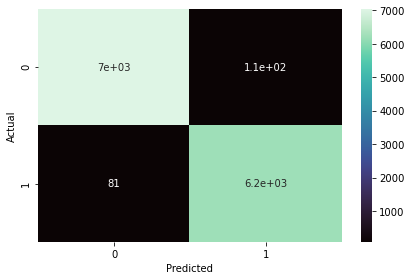

In [38]:
sns.heatmap(pd.DataFrame(con_log), annot=True, cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Decision Tree Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()
dt.fit(x_vec_train, y_train)

DecisionTreeClassifier()

In [41]:
pred_dt = dt.predict(x_vec_test)
pred_dt

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
dt.score(x_vec_test, y_test)

0.994281045751634

In [43]:
con_dt = confusion_matrix(y_test,pred_dt)
con_dt 

array([[7114,   36],
       [  41, 6273]], dtype=int64)

In [44]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7150
           1       0.99      0.99      0.99      6314

    accuracy                           0.99     13464
   macro avg       0.99      0.99      0.99     13464
weighted avg       0.99      0.99      0.99     13464



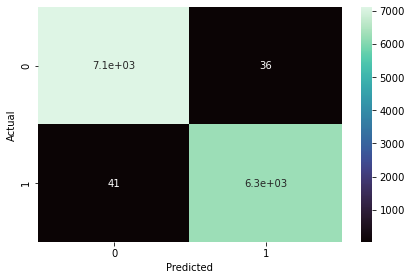

In [45]:
sns.heatmap(pd.DataFrame(con_dt), annot=True, cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_vec_train, y_train)

RandomForestClassifier(random_state=0)

In [48]:
pred_rfc = rfc.predict(x_vec_test)

In [49]:
rfc.score(x_vec_test, y_test)

0.9901960784313726

In [50]:
con_rfc = confusion_matrix(y_test,pred_rfc)
con_rfc

array([[7096,   54],
       [  78, 6236]], dtype=int64)

In [51]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7150
           1       0.99      0.99      0.99      6314

    accuracy                           0.99     13464
   macro avg       0.99      0.99      0.99     13464
weighted avg       0.99      0.99      0.99     13464



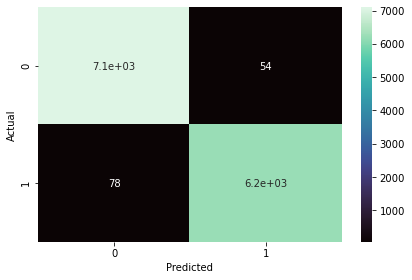

In [52]:
sns.heatmap(pd.DataFrame(con_rfc), annot=True, cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(x_vec_train, y_train)

GradientBoostingClassifier(random_state=0)

In [55]:
pred_gbc = gbc.predict(x_vec_test)

In [56]:
gbc.score(x_vec_test, y_test)

0.9953208556149733

In [57]:
con_gbc = confusion_matrix(y_test,pred_gbc)

In [58]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7150
           1       0.99      1.00      1.00      6314

    accuracy                           1.00     13464
   macro avg       1.00      1.00      1.00     13464
weighted avg       1.00      1.00      1.00     13464



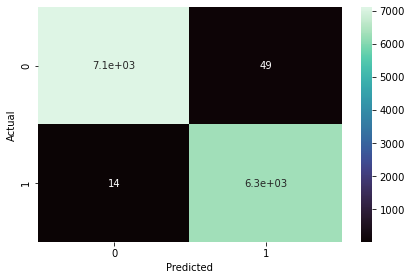

In [59]:
sns.heatmap(pd.DataFrame(con_gbc), annot=True, cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Model Testing With Manual Entry

In [60]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_x_vec_test = vectorization.transform(new_x_test)
    pred_LOG = log.predict(new_x_vec_test)
    pred_DT = dt.predict(new_x_vec_test)
    pred_GBC = gbc.predict(new_x_vec_test)
    pred_RFC = rfc.predict(new_x_vec_test)

    return print("\n\nLogistic Regression Prediction: {} \nDecision Tree Classification Prediction: {} \nGradient Boosting Classifier Prediction: {} \nRandom Forest Classifier Prediction: {}".format(output_lable(pred_LOG[0]), 
                                                                                                                                                                                                    output_lable(pred_DT[0]), 
                                                                                                                                                                                                    output_lable(pred_GBC[0]), 
                                                                                                                                                                                                    output_lable(pred_RFC[0])))

# Testing the news

In [63]:
news = str(input())
manual_testing(news)


  @media print {
    .ms-editor-squiggles-container {
      display:none !important;
    }
  }
  .ms-editor-squiggles-container {
    all: initial;
  }Donald Trump on Saturday threatened to bring a woman that Bill Clinton had an extramarital affair with when he debates Hillary Clinton.Trump tweeted this response to Mark Cuban sitting in the front row, in an attempt to rattle him during the debates:If dopey Mark Cuban of failed Benefactor fame wants to sit in the front row, perhaps I will put Gennifer Flowers right alongside of him!When Hillary Clinton takes the podium at Monday night s first presidential debate, she could be staring down an old romantic rival sitting in the front row.Gennifer Flowers, who carried on a 12-year affair with Bill Clinton when he was attorney general and governor of Arkansas, might attend the debate at Hofstra University as Trump s guest, BuzzFeed reported Saturday. Ms. Flowers has agreed to join Donald at the debate,  her personal assistant, Judy Stell, w

In [64]:
news = str(input())
manual_testing(news)

TOKYO (Reuters) - Japanese Foreign Minister Taro Kono said he thinks the missile that North Korea fired on Friday was an intercontinental ballistic missile (ICBM), given its firing range, public broadcaster NHK reported. North Korea fired a missile on Friday that flew over Japan s northern Hokkaido far out into the Pacific Ocean, South Korean and Japanese officials said, further ratcheting up tensions after Pyongyang s recent test of a powerful nuclear bomb.


Logistic Regression Prediction: Real News 
Decision Tree Classification Prediction: Real News 
Gradient Boosting Classifier Prediction: Real News 
Random Forest Classifier Prediction: Real News
